Nama : Yefta Yosia Asyel

NIM : 220211060372

Kelas : TIK2052-B

**Tugas 4 - Pengolahan Citra Digital**

## **Translasi Citra**

Saving fotosaya_1000px.jpg to fotosaya_1000px (2).jpg


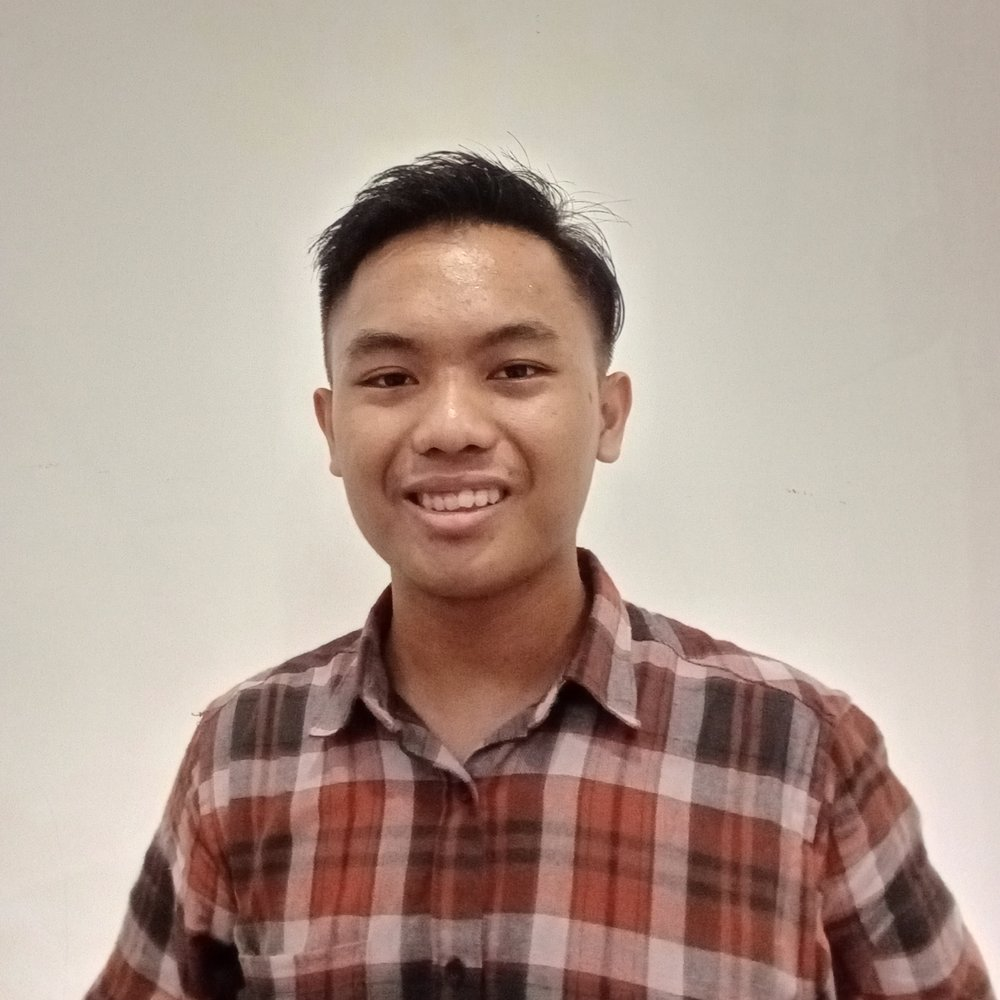

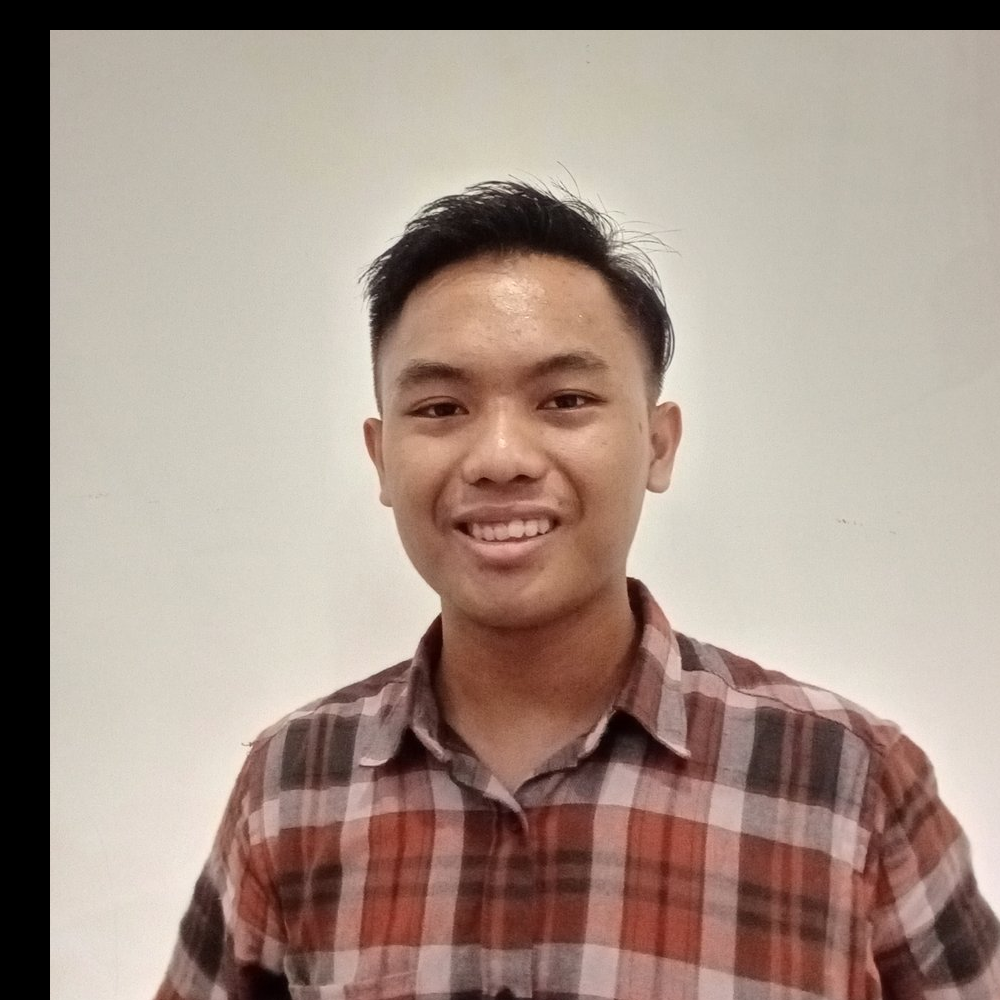

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Unggah gambar ke sesi Google Colab
from google.colab import files
uploaded = files.upload()
#Pastikan gambar berhasil diunggah
file_name = list(uploaded.keys())[0]
#Load the image
image = cv2.imread(file_name)
loaded_img = image
#Check if the image is loaded successfully
if image is None:
  print("Error: Unable to load image.")
else:
#Tentukan jumlah pixel untuk translasi (misalnya, 50 pixel ke kanan dan 30 pixel ke bawah)
 tx = 50
 ty = 30
#Buat matriks transformasi untuk translasi
 M = np.float32([[1, 0, tx], [0, 1, ty]])
#Lakukan translasi menggunakan warpAffine
 translated_image = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

# Tampilkan gambar asli dan gambar yang telah ditranslasikan
 cv2_imshow(image)
 cv2_imshow(translated_image)

**Flowchart Translasi Citra**

Saving 1-translasi.png to 1-translasi (1).png


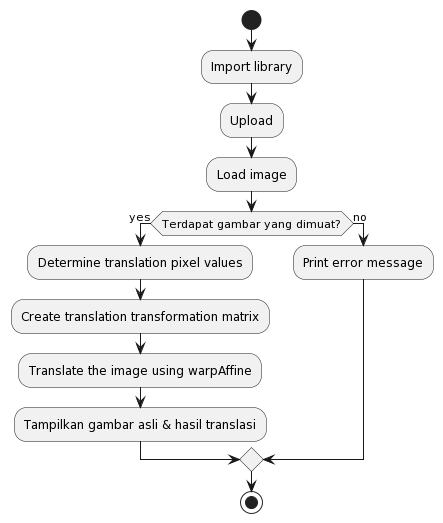

In [31]:
uploaded = files.upload()

nama_file = list(uploaded.keys())[0]

load_img = cv2.imread(nama_file)

cv2_imshow(load_img)

## **Rotasi Citra dan Transpose**

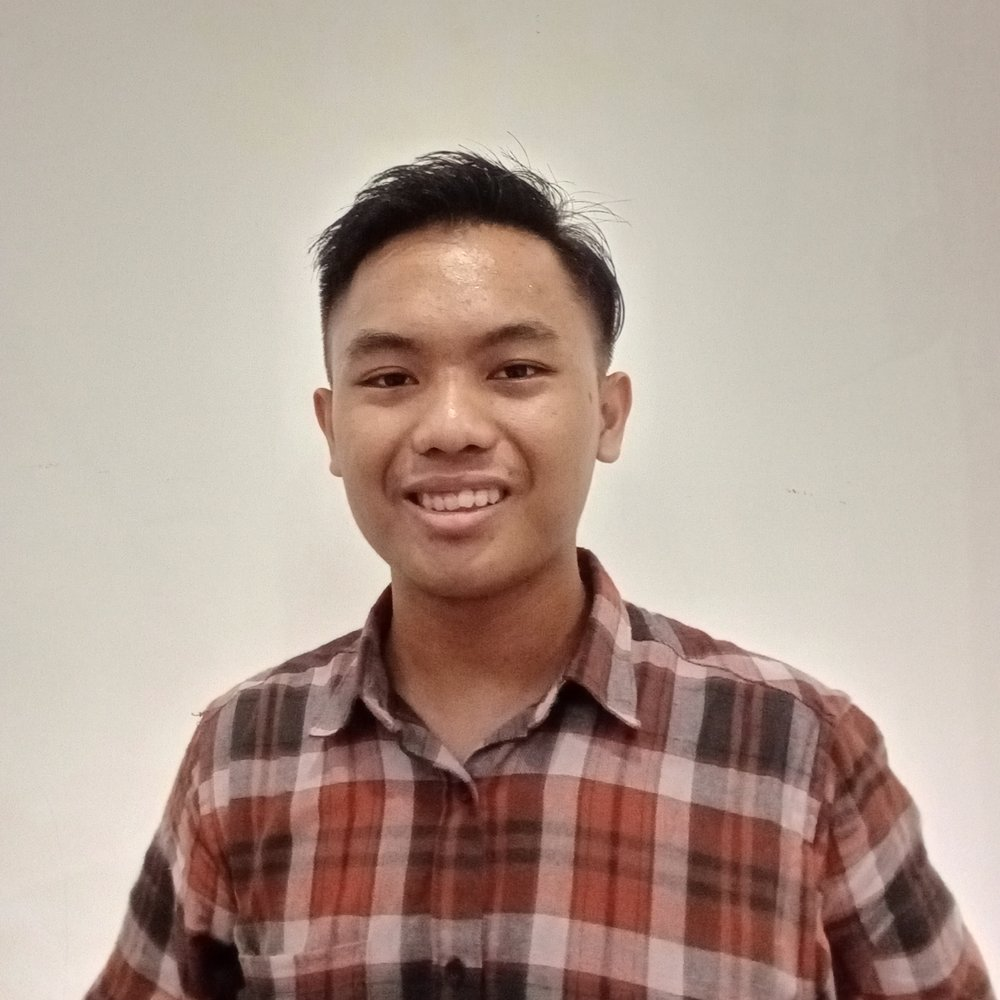

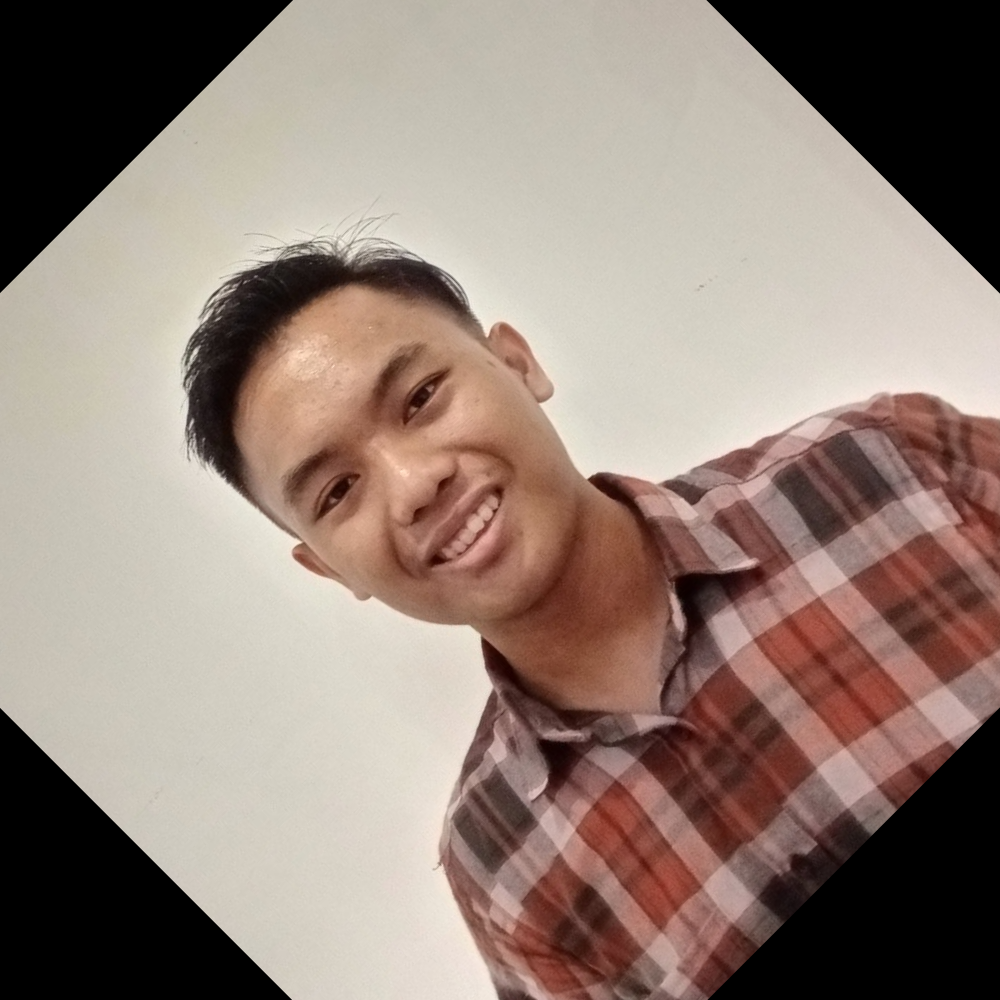

In [32]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load the image (replace 'image.jpg' with the path to your image)
image = cv2.imread('fotosaya_1000px.jpg')
# Check if the image is loaded successfully
if image is None:
                   print("Error: Unable to load image.")
else:
# Tentukan sudut rotasi (misalnya, rotasi 45 derajat searah jarum jam)
 angle = 45
# Hitung titik tengah rotasi
 (h, w) = image.shape[:2]
 center = (w //2, h // 2)
# Buat matriks rotasi
 M= cv2.getRotationMatrix2D (center, angle, 1.0)
# Lakukan rotasi pada citra
 rotated_image = cv2.warpAffine(image, M, (w, h))
# Tampilkan gambar asli dan gambar yang telah dirotasi
 cv2_imshow(image)
 cv2_imshow(rotated_image)

**Flowchart Rotasi Citra & Transpose**

Saving 2-rotasi-transpose.png to 2-rotasi-transpose.png


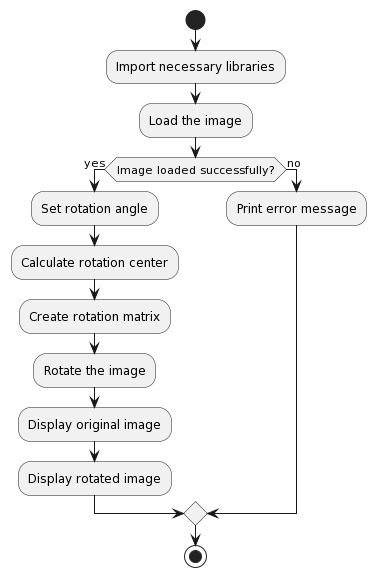

In [33]:
uploaded = files.upload()

nama_file = list(uploaded.keys())[0]

load_img = cv2.imread(nama_file)

cv2_imshow(load_img)

## **Resize**

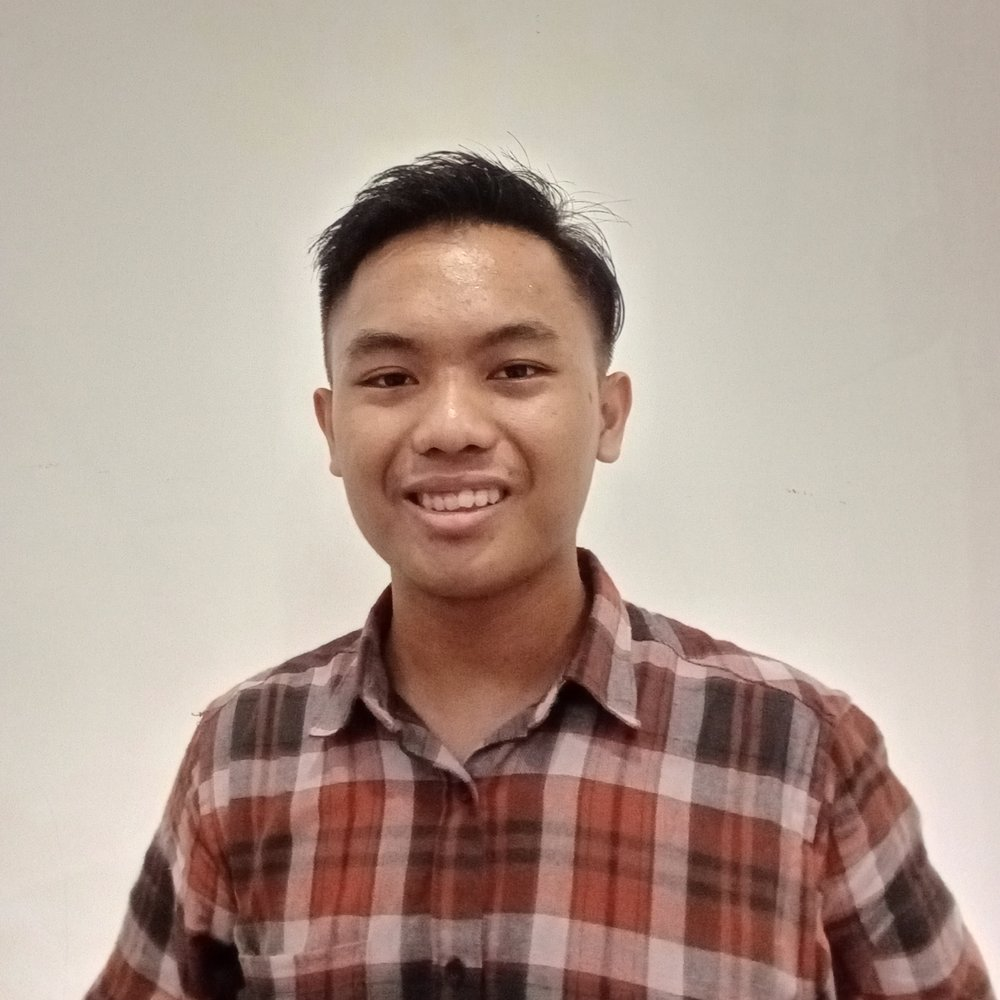

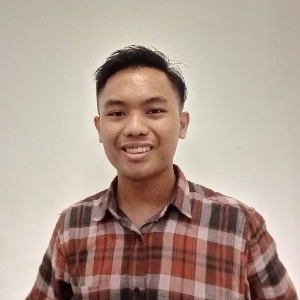

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Load the image (replace 'image.jpg" with the path to your image)
image = cv2.imread('fotosaya_1000px.jpg')
# Check if the image is loaded successfully
if image is None:
  print("Error: Unable to load image.")
else:
# Tentukan ukuran yang diinginkan (misalnya, lebar baru 300px)
 new_width = 300
# Hitung rasio aspek untuk menjaga proporsi
 ratio = new_width / image.shape[1]
 new_height = int(image.shape[0] * ratio)
# Resize image
resized_image = cv2.resize(image, (new_width, new_height))

# Tampilkan gambar asli dan gambar yang telah diresize
cv2_imshow(image)
cv2_imshow(resized_image)

**Flowchart Resize**

Saving 3-resize.png to 3-resize.png


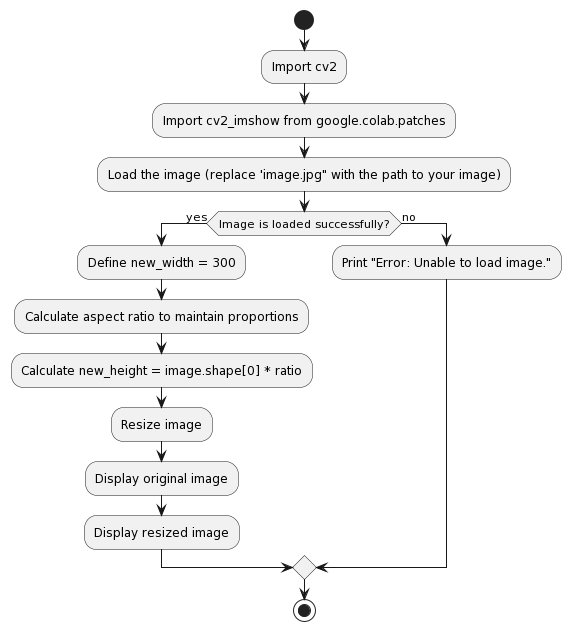

In [34]:
uploaded = files.upload()

nama_file = list(uploaded.keys())[0]

load_img = cv2.imread(nama_file)

cv2_imshow(load_img)

## **Crop**

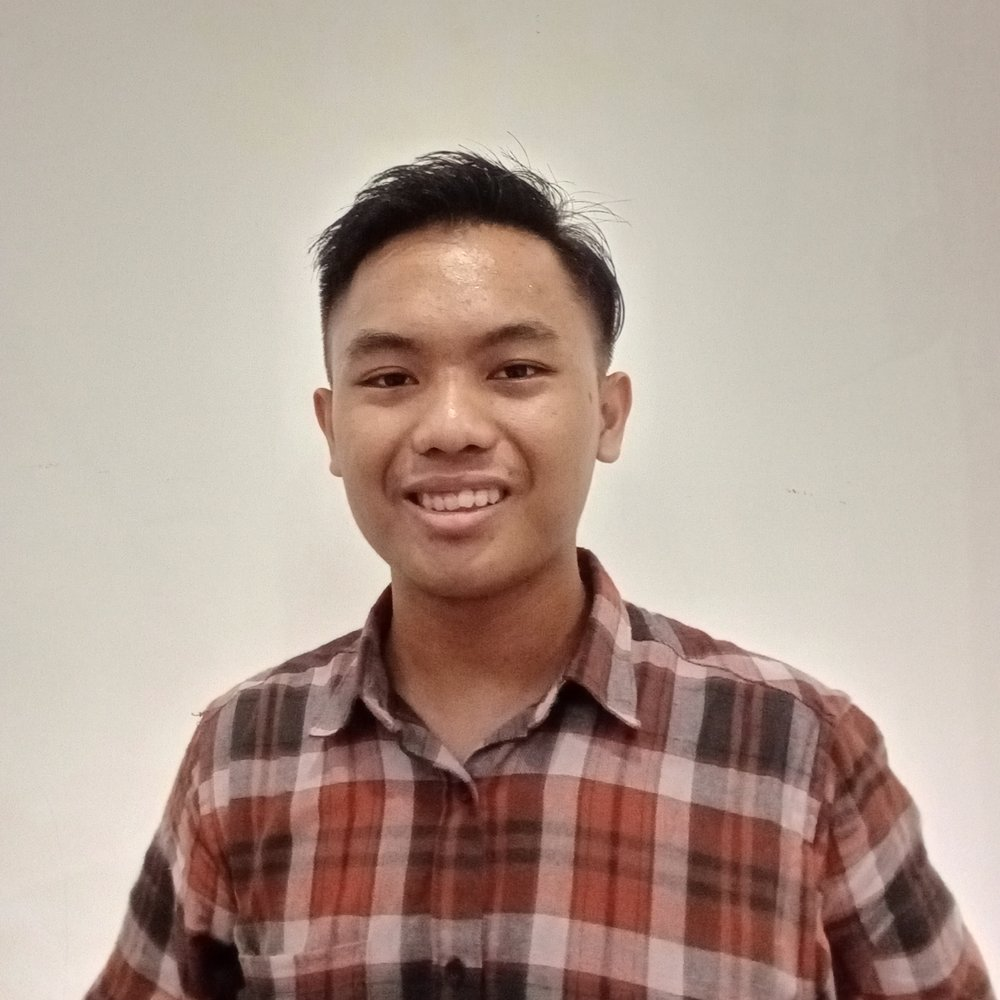

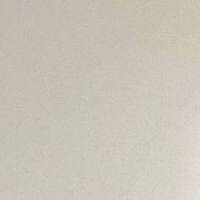

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Load the image (replace 'image.jpg' with the path to your image)
image = cv2.imread('fotosaya_1000px.jpg')
# Check if the image is loaded successfully
if image is None:
  print("Error: Unable to load image.")
else:
#Tentukan koordinat pojok kiri atas dan pojok kanan bawah untuk melakukan cropping
 x1, y1 = 100, 100 # Koordinat pojok kiri atas
 x2, y2 = 300, 300 # Koordinat pojok kanan bawah
#Crop image
 cropped_image = image [y1:y2, x1:x2]

#Tampilkan gambar asli dan gambar yang telah di-crop
 cv2_imshow(image)
 cv2_imshow(cropped_image)

**Flowchart Crop***

Saving 4-corp.png to 4-corp.png


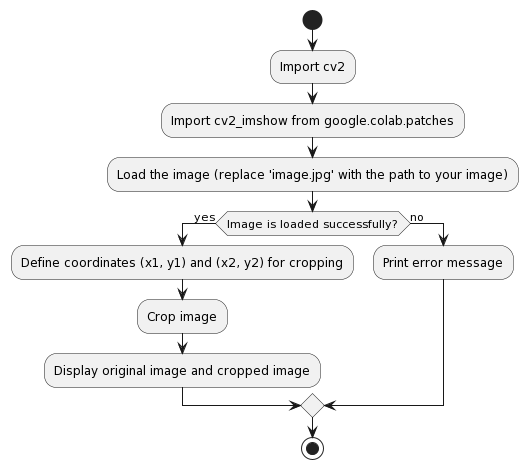

In [35]:
uploaded = files.upload()

nama_file = list(uploaded.keys())[0]

load_img = cv2.imread(nama_file)

cv2_imshow(load_img)

## **Morfologi Citra**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import coins
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.morphology import label, closing, square
from skimage.measure import regionprops
from skimage.color import lab2rgb
%matplotlib inline

In [ ]:
def show(img, cmap=None):
  cmap = cmap or plt.cm.gray
  fig, ax = plt.subplots(1, 1, figsize=(8, 6))
  ax.imshow(img, cmap=cmap)
  ax.set_axis_off()
  plt.show()

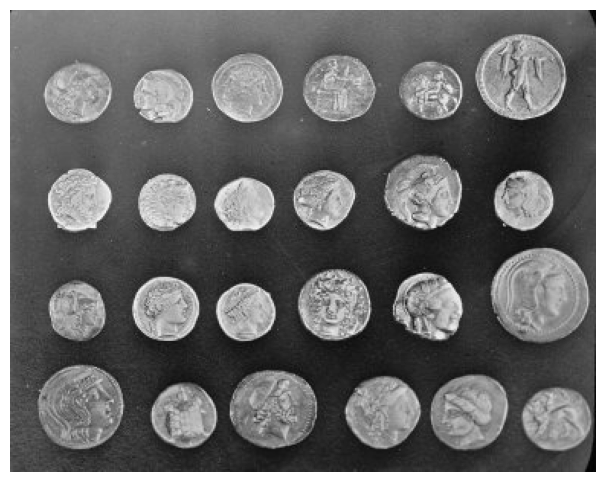

In [ ]:
img = coins()
show(img)

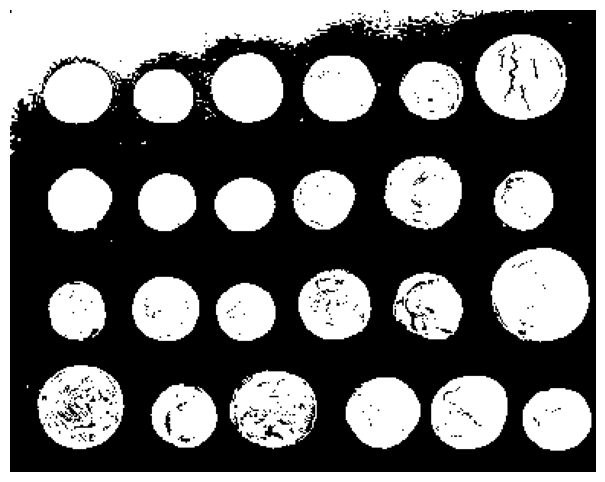

In [ ]:
threshold_otsu (img)
107
show(img > 107)

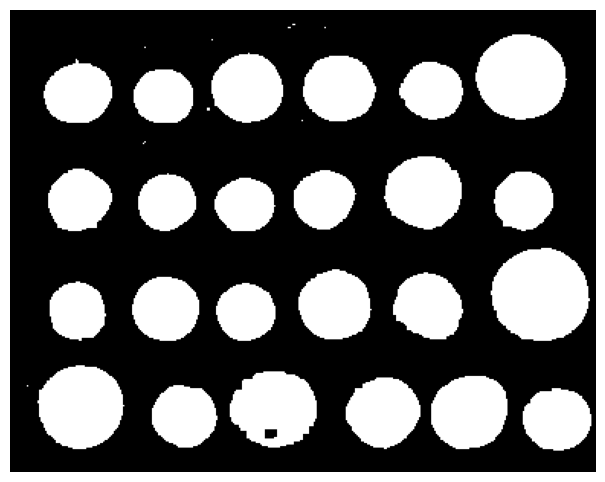

In [ ]:
img_bin = clear_border(closing(img > 120,
square(5)))
show(img_bin)

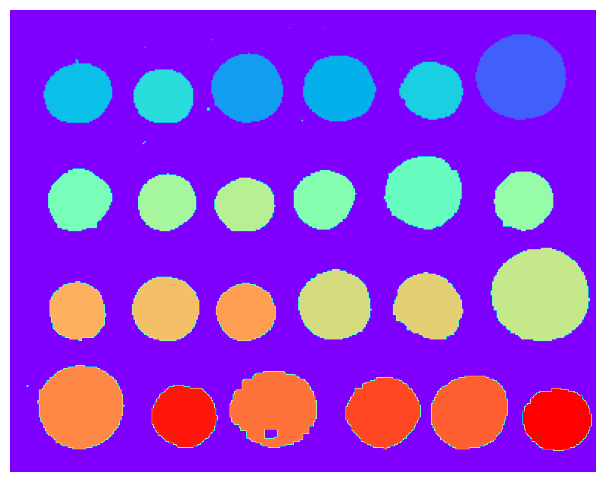

In [ ]:
labels= label (img_bin)

# Menampilkan hasil labeling dengan menggunakan cmap rainbow
show(labels, cmap=plt.cm.rainbow)

In [ ]:
regions = regionprops(labels)

In [ ]:
boxes = np.array([label['BoundingBox']
for label in regions
if label ['Area'] > 100])
print(f"There are {len(boxes)} coins.")

There are 24 coins.


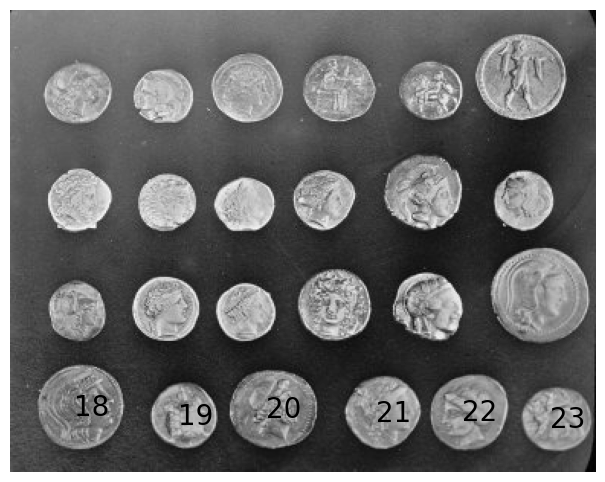

In [ ]:
fig, ax = plt.subplots(1, 1, figsize= (8, 6))

# Menampilkan gambar
ax.imshow(img, cmap=plt.cm.gray)
ax.set_axis_off()

# Mendapatkan koordinat kotak
xs = boxes [:,[1,3]].mean(axis=1)
ys = boxes [:,[0,2]].mean(axis=1)

# Melakukan iterasi untuk setiap baris dan kolom
for row in range(4):
  if row < 3:
    ind = ((ys[6 * row] <= ys ) & (ys < ys[6 * row + 6]) )
  else:
    ind = (ys[6 * row] <= ys)

ind = np.nonzero(ind)[0]
reordered = ind[np.argsort(xs[ind])]
xs_row = xs[reordered]
ys_row = ys[reordered]

for col in range(6):
  n = 6 * row + col
  ax.text(xs_row[col] - 5, ys_row[col] + 5, str(n), fontsize=20)

# Menampilkan plot
plt.show()

**Flowchart Morfologi Citra**

Saving 5-morfologi.png to 5-morfologi.png


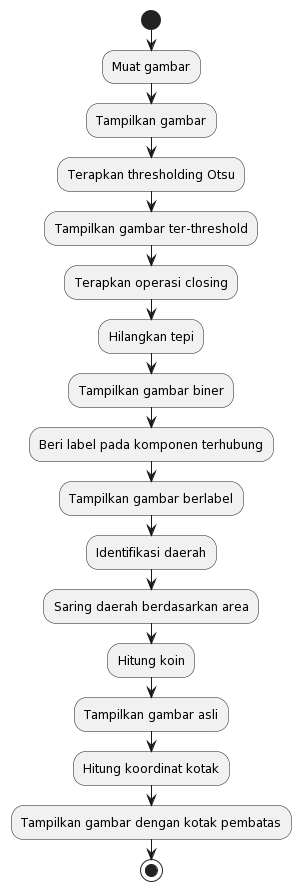

In [37]:
uploaded = files.upload()

nama_file = list(uploaded.keys())[0]

load_img = cv2.imread(nama_file)

cv2_imshow(load_img)

## Gambar & Flowchart yang digunakan

[Gambar](https://unsratacid-my.sharepoint.com/:f:/g/personal/yeftaasyel026_student_unsrat_ac_id/Ek-t0yGvbdpPim413IGUg_oBvB5dOj5MstGT4laR7FQQNw?e=6CGmNt)